In [12]:
import librenderman as rm

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
path = "/Library/Audio/Plug-Ins/VST/Serum.vst"
# path = '/Library/Audio/Presets/Xfer Records/Serum Presets/Presets/User/test_preset.fxp'

engine.load_plugin(path)
generator = rm.PatchGenerator(engine)

print(engine.get_plugin_parameters_description())

  0: MasterVol
  1: A Vol
  2: A Pan
  3: A Octave
  4: A Semi
  5: A Fine
  6: A Unison
  7: A UniDet
  8: A UniBlend
  9: A Warp
 10: A CoarsePit
 11: A WTPos
 12: A RandPhase
 13: A Phase
 14: B Vol
 15: B Pan
 16: B Octave
 17: B Semi
 18: B Fine
 19: B Unison
 20: B UniDet
 21: B UniBlend
 22: B Warp
 23: B CoarsePit
 24: B WTPos
 25: B RandPhase
 26: B Phase
 27: Noise Level
 28: Noise Pitch
 29: Noise Fine
 30: Noise Pan
 31: Noise RandPhase
 32: Noise Phase
 33: Sub Osc Level
 34: Sub Osc Pan
 35: Env1 Atk
 36: Env1 Hold
 37: Env1 Dec
 38: Env1 Sus
 39: Env1 Rel
 40: OscA>Fil
 41: OscB>Fil
 42: OscN>Fil
 43: OscS>Fil
 44: Fil Type
 45: Fil Cutoff
 46: Fil Reso
 47: Fil Driv
 48: Fil Var
 49: Fil Mix
 50: Fil Stereo
 51: Env2 Atk
 52: Env2 Hld
 53: Env2 Dec
 54: Env2 Sus
 55: Env2 Rel
 56: Env3 Atk
 57: Env3 Hld
 58: Env3 Dec
 59: Env3 Sus
 60: Env3 Rel
 61: LFO1 Rate
 62: LFO2 Rate
 63: LFO3 Rate
 64: LFO4 Rate
 65: PortTime
 66: PortCurve
 67: Chaos1 BPM
 68: Chaos2 BPM
 69: C

In [20]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

In [21]:
# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

audio = engine.get_audio_frames()

patch = engine.get_patch()

for parameter in patch:
    # Unpack and print the parameter tuple.
    index, value = parameter
    print("Index: " + '{:3d}'.format(index) + " --- Value: " + str(value))

Index:   0 --- Value: 0.38948413729667664
Index:   1 --- Value: 0.36397185921669006
Index:   2 --- Value: 0.02422870323061943
Index:   3 --- Value: 0.8356171250343323
Index:   4 --- Value: 0.36138585209846497
Index:   5 --- Value: 0.02376430295407772
Index:   6 --- Value: 0.7230453491210938
Index:   7 --- Value: 0.8854639530181885
Index:   8 --- Value: 0.9718195199966431
Index:   9 --- Value: 0.40506213903427124
Index:  10 --- Value: 0.527640700340271
Index:  11 --- Value: 0.7513484358787537
Index:  12 --- Value: 0.3618340492248535
Index:  13 --- Value: 0.4081156253814697
Index:  14 --- Value: 0.6981360912322998
Index:  15 --- Value: 0.11628612875938416
Index:  16 --- Value: 0.08280831575393677
Index:  17 --- Value: 0.44550204277038574
Index:  18 --- Value: 0.8030971884727478
Index:  19 --- Value: 0.6313521862030029
Index:  20 --- Value: 0.29121097922325134
Index:  21 --- Value: 0.9318729639053345
Index:  22 --- Value: 0.8022104501724243
Index:  23 --- Value: 0.4917639195919037
Index: 

Text(0.5, 0, 'Time (frame count)')

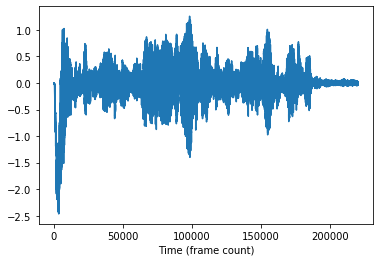

In [22]:
import matplotlib.pyplot as plt

plt.plot(audio)
plt.xlabel('Time (frame count)')

In [23]:
from IPython.display import Audio

Audio(audio, rate=sampleRate)